In [ ]:
import numpy as np
import pandas as pd
import glob
from pathlib import Path
import matplotlib.pyplot as plt
from scipy import stats
import os
from scipy.stats import sem
from matplotlib.lines import Line2D
import sys
sys.path.append("../../behavior")
import behavior.boris_extraction as boris
import pickle

def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

c:\Users\megha\anaconda3\envs\ephys_env\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [13]:
boris_data_path = r"C:\Users\megha\Documents\Padilla-Coreano\homecage_social_ephys_vids\pilot2\boris\habit_dishabit_aggregated\*"
file_paths = glob.glob(boris_data_path)

dictOfBoris={}
df_list =[]
for file_path in file_paths:
    if file_path.endswith('.csv'):
        phase1_df = pd.read_csv(file_path)
    elif file_path.endswith('.tsv'):
        phase1_df = pd.read_csv(file_path, sep='\t')
    df_list.append(phase1_df)
    phase1_df.name = file_path
    filename_no_ext = os.path.splitext(os.path.basename(file_path))[0]
    dictOfBoris[filename_no_ext] = phase1_df
    print(filename_no_ext)
    print(len(phase1_df['Behavior'].unique()))

11_cage_p1_aggregated
6
11_nov_p1_aggregated
7
12_cage_p1_aggregated
7
12_nov_p1_aggregated
6
13_cage_p1_aggregated
5
13_nov_p1_aggregated
6
21_cage_p1_aggregated
4
21_nov_p1_aggregated
5
22_cage_p1_aggregated
5
22_nov_p1_aggregated
6
23_cage_p1_aggregated
6
23_nov_p1_aggregated
5
24_cage_p1_aggregated
5
24_nov_p1_aggregated
5
31_cage_p1_aggregated
4
31_nov_p1_aggregated
4
32_cage_p1_aggregated
4
32_nov_p1_aggregated
5
33_cage_p1_aggregated
5
33_nov_p1_aggregated
4
41_cage_p1_aggregated
6
41_nov_p1_aggregated
4
44_cage_p1_aggregated
7
44_nov_p1_aggregated
6


In [10]:
print(dictOfBoris.keys())

dict_keys(['11_cage_p1_aggregated', '11_nov_p1_aggregated', '12_cage_p1_aggregated', '12_nov_p1_aggregated', '13_cage_p1_aggregated', '13_nov_p1_aggregated', '21_cage_p1_aggregated', '21_nov_p1_aggregated', '22_cage_p1_aggregated', '22_nov_p1_aggregated', '23_cage_p1_aggregated', '23_nov_p1_aggregated', '24_cage_p1_aggregated', '24_nov_p1_aggregated', '31_cage_p1_aggregated', '31_nov_p1_aggregated', '32_cage_p1_aggregated', '32_nov_p1_aggregated', '33_cage_p1_aggregated', '33_nov_p1_aggregated', '41_cage_p1_aggregated', '41_nov_p1_aggregated', '44_cage_p1_aggregated', '44_nov_p1_aggregated'])


In [14]:
dictOfBoris['11_nov_p1_aggregated']

,Observation id,Observation date,Description,Media file,Total length,FPS,Subject,Behavior,Behavioral category,Modifiers,Behavior type,Start (s),Stop (s),Duration (s),Comment start,Comment stop
0,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,mice back in,NaN,NaN,POINT,602.133,602.133,NaN,NaN,NaN
1,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,facial sniffing,NaN,NaN,STATE,605.133,606.200,1.067,NaN,NaN
2,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,subject,facial sniffing,NaN,NaN,STATE,605.135,606.138,1.003,NaN,NaN
3,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,subject,anogenital sniffing,NaN,NaN,STATE,606.886,618.887,12.001,NaN,NaN
4,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,anogenital sniffing,NaN,NaN,STATE,608.933,613.133,4.200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,anogenital sniffing,NaN,NaN,STATE,2325.200,2328.600,3.400,NaN,NaN
370,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,facial sniffing,NaN,NaN,STATE,2328.600,2330.332,1.732,NaN,NaN
371,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,anogenital sniffing,NaN,NaN,STATE,2330.333,2330.799,0.466,NaN,NaN
372,11_nov_p1,2024-09-25 10:43:19,NaN,/Users/naylajimenez/Downloads/11_nov_p1_conver...,2341.53,15.0,social_agent,facial sniffing,NaN,NaN,STATE,2330.800,2334.133,3.333,NaN,NaN


In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import random

def create_ethogram(df, start, output_file=None, color_map=None, figsize=None):
    """
    Create an ethogram visualization from a dataframe.
    
    Parameters:
    -----------
    df : pandas DataFrame
        DataFrame containing the behavioral data with columns:
        - 'Subject': subject identifier
        - 'Behavior': behavior type
        - 'Start (s)': start time in seconds
        - 'Stop (s)': stop time in seconds
    
    output_file : str, optional
        Path to save the output figure. If None, the figure is displayed instead.
    
    color_map : dict, optional
        Dictionary mapping behavior names to color codes (hex, RGB, or named colors)
        Example: {'Eating': '#FF5733', 'Running': 'blue', 'Resting': (0.2, 0.8, 0.2)}
        If None, random colors will be generated.
    
    figsize : tuple, optional
        Figure size as (width, height) in inches. If None, a default size will be used.
    
    Returns:
    --------
    fig, ax : matplotlib figure and axes objects
    """
    # Get unique subjects and behaviors
    subjects = df['Subject'].unique()
    behaviors = df['Behavior'].unique()
    
    # Create a color map for behaviors
    if color_map is None:
        # Generate random colors if no color map is provided
        np.random.seed(42)  # For reproducible colors
        colors = {}
        for behavior in behaviors:
            colors[behavior] = np.random.rand(3,)  # Random RGB
    else:
        # Use provided color map and generate random colors for any missing behaviors
        colors = color_map.copy()
        missing_behaviors = [b for b in behaviors if b not in colors]
        if missing_behaviors:
            np.random.seed(42)
            for behavior in missing_behaviors:
                colors[behavior] = np.random.rand(3,)  # Random RGB
                print(f"Warning: No color specified for '{behavior}', using a random color.")
    
    # Find the maximum time for x-axis limit
    max_time = df['Stop (s)'].max()
    
    # Create figure and axis
    if figsize is None:
        figsize = (12, len(subjects) * 0.8 + 4)
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot behavior blocks for each subject
    for i, subject in enumerate(subjects):
        # Filter data for this subject
        subject_data = df[df['Subject'] == subject]
        
        # Plot each behavior period
        for _, row in subject_data.iterrows():
            # Create a rectangle for this behavior
            rect = patches.Rectangle(
                (row['Start (s)'], i -0.4),  # (x, y)
                row['Stop (s)'] - row['Start (s)'],  # width
                0.8,  # height
                linewidth=1,
                facecolor=colors[row['Behavior']],
                alpha=0.8,
                label=row['Behavior']
            )
            ax.add_patch(rect)
            
        
    
    # Set axis limits and labels
    ax.set_xlim(0, max_time * 1.05)
    ax.set_ylim(-0.5, len(subjects)-0.5)
    ax.set_yticks(range(len(subjects)))
    ax.tick_params(labelsize = 14)
    ax.set_yticklabels(subjects, fontsize = 16)
    ax.set_xlabel('Time (s)', fontsize = 16)
    ax.set_ylabel('')
    ax.set_title('Behavioral Ethogram', fontsize = 24)
   
    # Create a legend for behaviors
    handles = [
        patches.Patch(color=colors[behavior], label=behavior) 
        for behavior in behaviors
    ]
    ax.legend(
        handles=handles, 
        loc='upper right', 
        bbox_to_anchor=(1.35, 1),
        ncol=1 ,#min(len(behaviors), 5),
        frameon = False,
        fontsize = 16
    )
    
    # Adjust layout
    #plt.tight_layout()
    plt.show()
    # Save or show the figure
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
    
    return fig, ax


In [135]:
test_df = dictOfBoris['11_nov_p1_aggregated']

first_epoch_end = test_df[test_df['Behavior'] == 'mice taken out']['Start (s)'].tolist()[0]
start = test_df['Start (s)'].tolist()[0]
print(start)
first_five_min = test_df[test_df['Start (s)'] < first_epoch_end]
first_five_min = first_five_min[first_five_min['Behavior'] != 'mice back in']

first_five_min['Start (s)'] = first_five_min['Start (s)'] - start
first_five_min['Stop (s)'] = first_five_min['Stop (s)'] - start

602.133


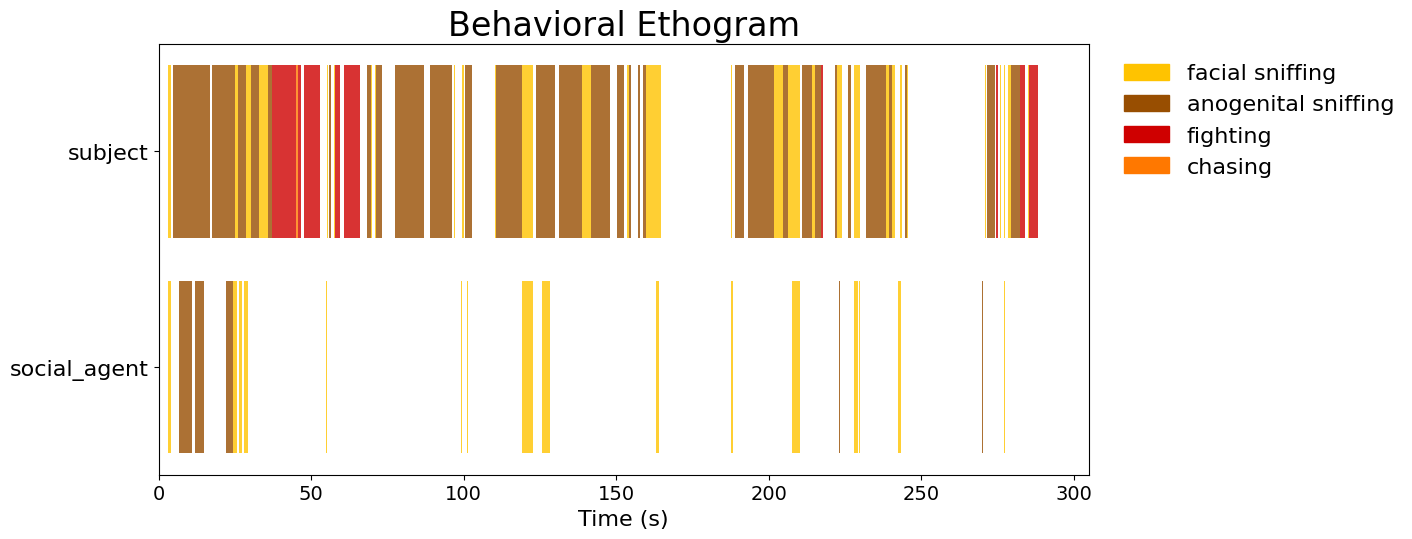

(<Figure size 1200x560 with 1 Axes>,
 <Axes: title={'center': 'Behavioral Ethogram'}, xlabel='Time (s)'>)

In [136]:
colors = {'fighting': '#cf0000',
          'chasing': '#ff7800',
          'facial sniffing': '#FFC300',
          'anogenital sniffing': '#984e01'
 }

create_ethogram(first_five_min, start = 0, color_map=colors)